__<h3>Option Pricing Binomial Tree Model</h3>__

Binomial tree is a diagram representing the different paths that can be folllowed by a stock during the life of an option. 
Underlying assumption here is that the stock price follows a random walk. At each time step stock price has a certain probability to move up and a certain probability to move down by a certain amount.<br></br>
Binomial Tree works on the assumptions of no arbritrage principle. Since there is no arbritrage, there is no uncertainity hence the return earned on such a portfolio is risk free interest.We then consider a portfolio of long position in delta shares and short position in an option. We calculate the value for delta and since there is no risk and we can calculate delta such that the portfolio price remain same even if the stock prices go up or down.<br></br> 

__Risk Neutral Valuation__<br></br>
This states that, when valuing a derivative, we can make the assumption that investors are risk-neutral, therefore, investors do not increase the expected return they require from an investment to compensate for increased risk. However,in real world the
required return incraeses as the risk increases.For option pricing the risk free world assumption provides similar results because as the risk increases the stock prices decrease however, the formulas relating the option price with stock price remains same. The rsik free world assumption provide two features to ease option pricing:-
- The expected return on a stock (or any other investment) is the risk-free rate.
- The discount rate used for the expected payoff on an option (or any other instrument) is the risk-free rate

Generalizing this by considering a portfolio having a long position in a stock whose price is $S_{o}$ and short position in an option on the stock (or any derivative dependent on the stock) whose current price is $f$. Stock price can either move up from $S_{o}$ to a new level, $S_{u}$,where u > 1, or down from $S_{o}$ to a new level, $S_{d}$, where d < 1.If the stock price moves up to $S_{u}$, we suppose that the payoff from the option is $f_{u}$; if the stock price moves down to $S_{d}$, we suppose the payoff from the option is $f_{d}$.

By equating the resultant portfolio in case the underlying stock goes up or down we get the value of delta as:-
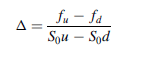
Therefore, delta is the change in the option price per unit change in the underlying security.

Cost of setting up the portfolio is 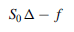 which is essentially the present worth of portfolio. 

If we discount the portfolio worth at maturity by risk free interest rate, this should equate to cost of setting up portfolio. From here we can calculate option price $f$ and $p$.
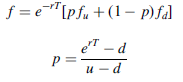

In [1]:
from stock_volatility import stock_volatility
import numpy as np
import pandas as pd

In [2]:
df = stock_volatility('AAPL','2017-08-18','2018-08-18')

C:\Users\Mehul Sharma\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


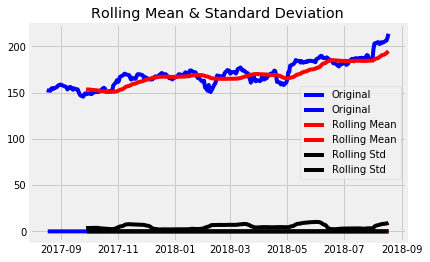

Results of Dickey-Fuller Test
(0.34899498926617073, 0.9794840001353982, 8, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, 1062.756799434565)
Test Statistic                   0.348995
p-value                          0.979484
#Lags Used                       8.000000
Number of Observations Used    243.000000
Critical Value(1%)              -3.457551
Critical Value(5%)              -2.873509
Critical Value(10%)             -2.573148
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            1.306938
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)   

C:\Users\Mehul Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df.stationarity_test(df.stock_data,'Adj Close')

Since the test statistics is greater than critical value this time series is not stationary. Therefore, we will take the difffrence of log series

In [4]:
 df.stock_data["Log"] = np.log(df.stock_data)-np.log(df.stock_data.shift(1))

C:\Users\Mehul Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Mehul Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


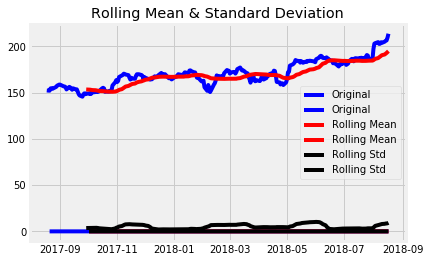

Results of Dickey-Fuller Test
(-6.392200786385781, 2.0925257966696636e-08, 7, 243, {'1%': -3.4575505077947746, '5%': -2.8735087323013526, '10%': -2.573148434859185}, -1345.7882378859538)
Test Statistic                -6.392201e+00
p-value                        2.092526e-08
#Lags Used                     7.000000e+00
Number of Observations Used    2.430000e+02
Critical Value(1%)            -3.457551e+00
Critical Value(5%)            -2.873509e+00
Critical Value(10%)           -2.573148e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.131098
p-value                   0.100000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Per

C:\Users\Mehul Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [5]:
df.stationarity_test(df.stock_data,'Log')

__Here We can see that now the time series can be called "Trend Stationary" as the test statistic is less than 1% Crtical value__

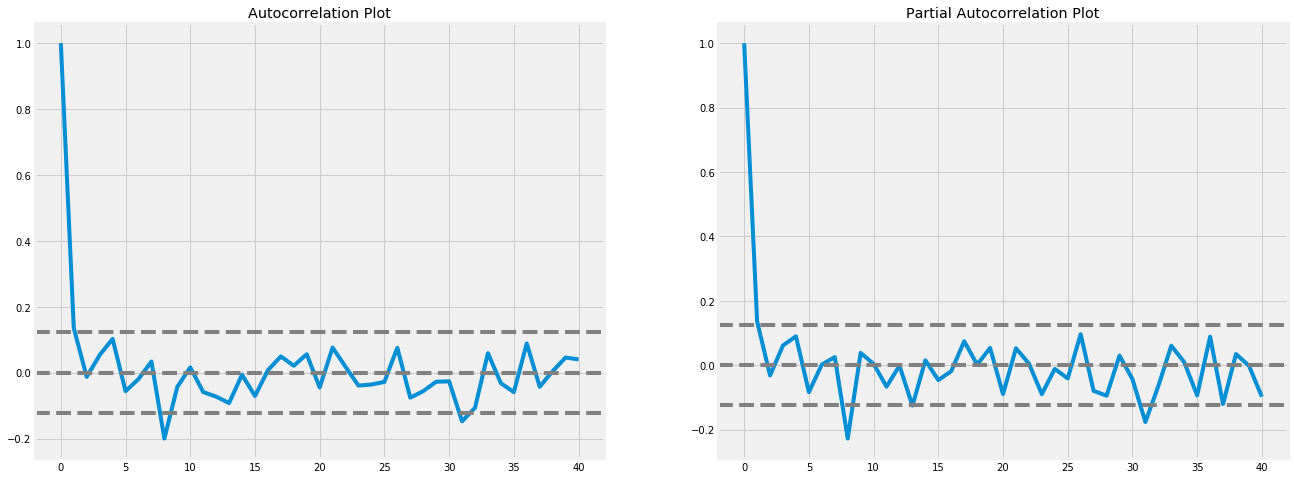

In [6]:
df.lags('Log')

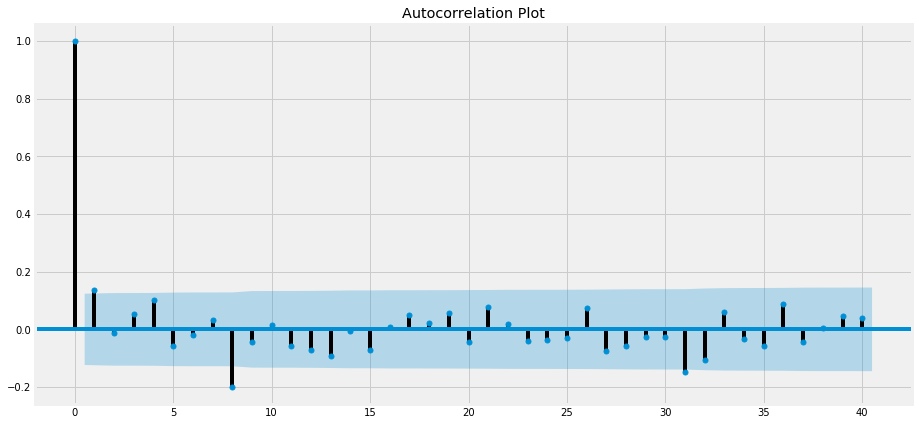

In [7]:
df.auto_graphics('Log')

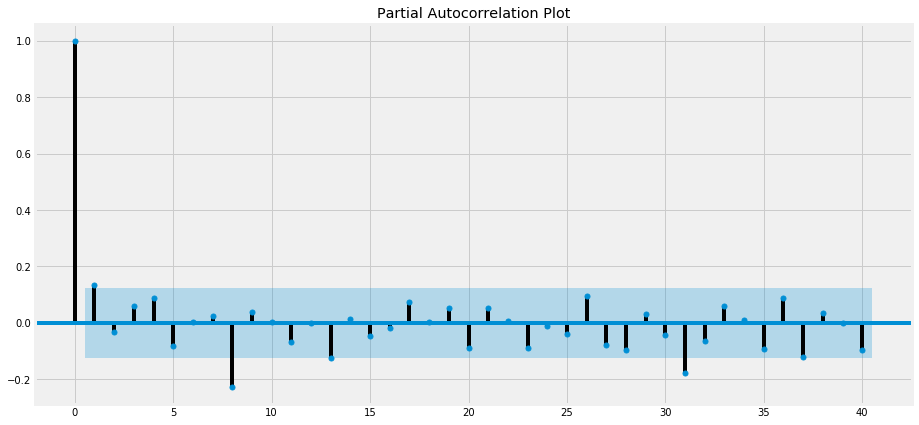

In [8]:
df.partial_graphics('Log')

In [9]:
sigma_mean = df.mean_sigma('Log')

In [10]:
#The convergence in Garch Model works better when variable value is between 1 to 1000 therefore,multiplying log series by 1000
df.stock_data["Log"] = df.stock_data["Log"] *1000
sigma_garch = df.garch_sigma('Log')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1000.5119224247165
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1000.4299931161731
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1000.3641383221768
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1000.362779060724
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1000.362668194574
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1000.3626651770415
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1000.3626651768698
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


In [11]:
print(sigma_mean)

0.013802807770015761


In [12]:
print(sigma_garch/1000)

0.014303250721676476


In [13]:
# Perentage Difference between Mean Sigma and Sigma obtained by GARCH Model
print((((sigma_garch/1000)-sigma_mean)/(sigma_garch/1000))*100)

3.4988057008767686


In [14]:
from stock_option import stockoption
from euro_option import *

In [15]:
stockopt = stockoption(217.58, 215, 0.05, 0.1, 4,'Log',{'tk': 'AAPL', 'is_calc': True, 'start': '2017-08-18',
                                                     'end': '2018-08-18', 'eu_option':False})

In [16]:
option_eu = euro_option(stockopt)

In [17]:
print(option_eu.stocktree(stockopt))
st = option_eu.stocktree(stockopt)

[[217.58   218.0551 218.5312 219.0084 219.4866]
 [216.6329 217.1059 217.58   218.0551 218.5312]
 [215.6899 216.1609 216.6329 217.1059 217.58  ]
 [214.7511 215.22   215.6899 216.1609 216.6329]
 [213.8163 214.2832 214.7511 215.22   215.6899]]


In [18]:
print(option_eu.option_price(st,stockopt))
opt_max = option_eu.option_price(st,stockopt)

[[0.     0.     0.     0.     4.4866]
 [0.     0.     0.     0.     3.5312]
 [0.     0.     0.     0.     2.58  ]
 [0.     0.     0.     0.     1.6329]
 [0.     0.     0.     0.     0.6899]]


In [19]:
print(option_eu.optpricetree(opt_max,stockopt))
opt_pr = option_eu.optpricetree(opt_max,stockopt)

[[3.6523 3.8599 4.0681 4.277  4.4866]
 [0.     2.9106 3.1168 3.3237 3.5312]
 [0.     0.     2.1697 2.3745 2.58  ]
 [0.     0.     0.     1.4295 1.6329]
 [0.     0.     0.     0.     0.6899]]


In [20]:
print(option_eu.begin_tree(stockopt))

[[3.6523 3.8599 4.0681 4.277  4.4866]
 [0.     2.9106 3.1168 3.3237 3.5312]
 [0.     0.     2.1697 2.3745 2.58  ]
 [0.     0.     0.     1.4295 1.6329]
 [0.     0.     0.     0.     0.6899]]


In [21]:
Option_price = opt_pr[0,0]
print(Option_price)

3.6523


In [22]:
from american_option import *

In [49]:
stockopt = stockoption(217.58, 215, 0.05, 0.1, 150,'Log',{'tk': 'AAPL', 'is_calc': True, 'start': '2017-08-18',
                                                     'end': '2018-08-18', 'eu_option':False})

In [50]:
option_am = american_option(stockopt)

In [51]:
print(option_am.stocktree(stockopt))
st = option_am.stocktree(stockopt)

[[217.58   217.6575 217.7351 ... 229.3575 229.4392 229.5209]
 [217.4251 217.5025 217.58   ... 229.1941 229.2758 229.3575]
 [217.2702 217.3476 217.4251 ... 229.0309 229.1125 229.1941]
 ...
 [195.8083 195.8781 195.9479 ... 206.4073 206.4808 206.5544]
 [195.6689 195.7386 195.8083 ... 206.2603 206.3338 206.4073]
 [195.5296 195.5992 195.6689 ... 206.1134 206.1869 206.2603]]


In [52]:
print(option_am.option_price(st,stockopt))
opt_max = option_am.option_price(st,stockopt)

[[ 0.      0.      0.     ...  0.      0.     14.5209]
 [ 0.      0.      0.     ...  0.      0.     14.3575]
 [ 0.      0.      0.     ...  0.      0.     14.1941]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]


In [53]:
print(option_am.optpricetree(st,opt_max,stockopt))
opt_pr = option_am.optpricetree(st,opt_max,stockopt)

[[ 3.653   3.7234  3.7938 ... 14.3718 14.4463 14.5209]
 [ 0.      3.5684  3.6387 ... 14.2085 14.283  14.3575]
 [ 0.      0.      3.4838 ... 14.0453 14.1197 14.1941]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]
